## Introduction

In this notebook we try to study the data of CO2 emmissions in Europe and try to answer some pressing questions. 

## Step 1. Get the data
The data are stored into a csv file called owid-co-2data . This file contains the information of CO2 emissions for every (most) country in the world. There are also aggregated data for the continents.

In [1]:

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns


df = pd.read_csv('/kaggle/input/co2-data/owid-co2-data.csv')


### Step 2. Explore the data

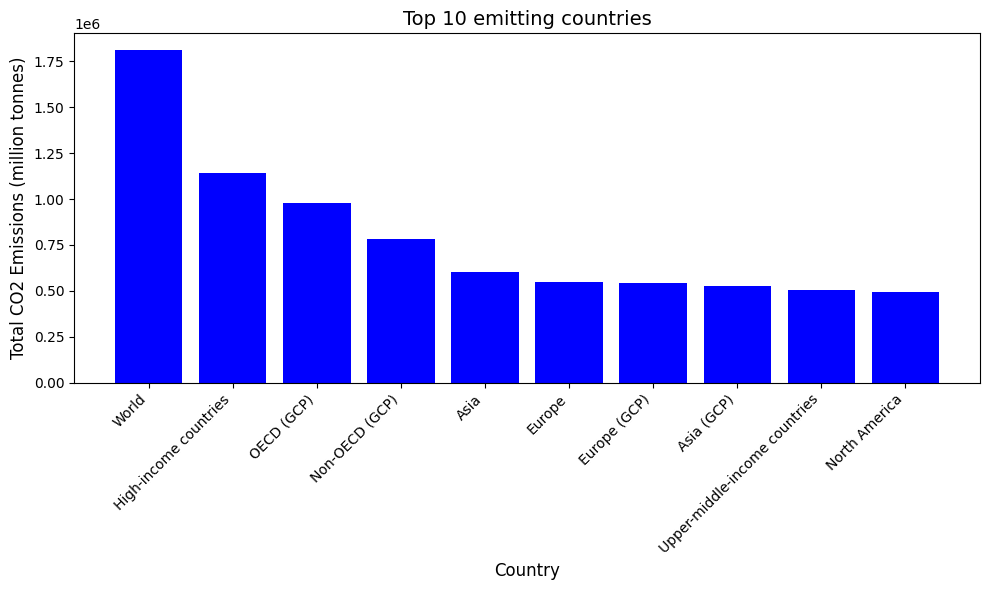

In [2]:
total_emissions = df.groupby('country')['co2'].sum().reset_index()

# Sort the countries by total CO2 emissions in descending order
total_emissions = total_emissions.sort_values(by='co2', ascending=False).reset_index(drop=True)

# Display the top 10 emitting countries
top_emitters = total_emissions.head(10)


plt.figure(figsize=(10, 6))
plt.bar(top_emitters['country'], top_emitters['co2'], color='blue')
plt.title('Top 10 emitting countries', fontsize=14)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Total CO2 Emissions (million tonnes)', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.tight_layout()
plt.show()

We see that we also have data related to the continents and other entities or groups. Since we're focusing on Europe , the Europe data will be very useful.

### How is the level of carbon emission in Europe evolving?
As mentioned before , we only need the data for the countries of Europe.As we saw above, in our data we see that we have in the country column aggregates for each continent. In our case we need the ones for Europe. We'll use the 'year' and the 'co2' column to create a plot with matplotlib.

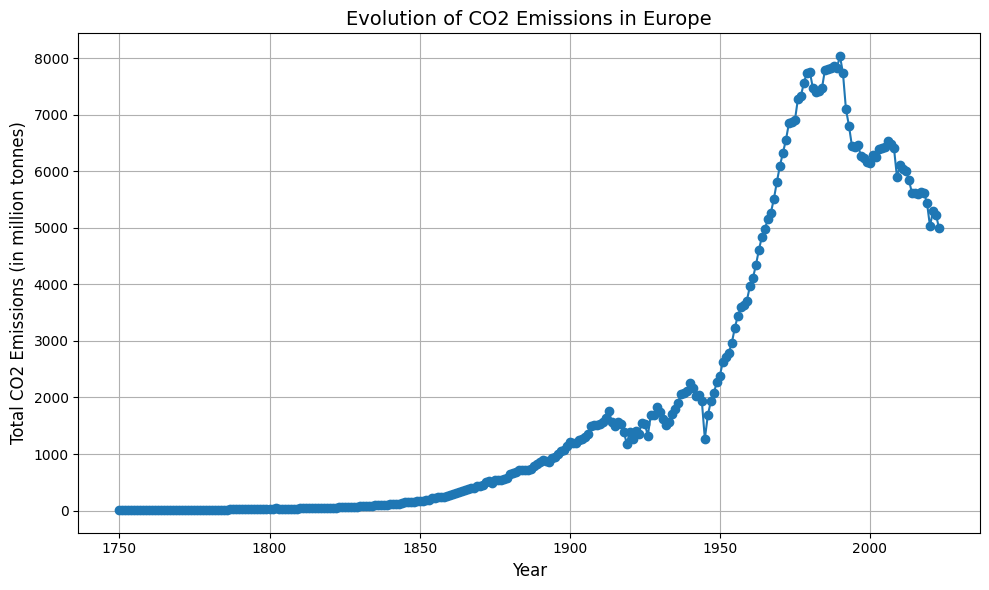

In [3]:

europe_aggregate_data = df[df['country'] == 'Europe']

# Dropping years that have no data
europe_emission_trend_aggregate = europe_aggregate_data[['year', 'co2']].dropna()

# Plot the trend for the aggregate data
plt.figure(figsize=(10, 6))
plt.plot(europe_emission_trend_aggregate['year'], europe_emission_trend_aggregate['co2'], marker='o', linestyle='-')
plt.title('Evolution of CO2 Emissions in Europe', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Total CO2 Emissions (in million tonnes)', fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()



To see that the data is the same , we can manually aggregate the data and we expect to see the same result.

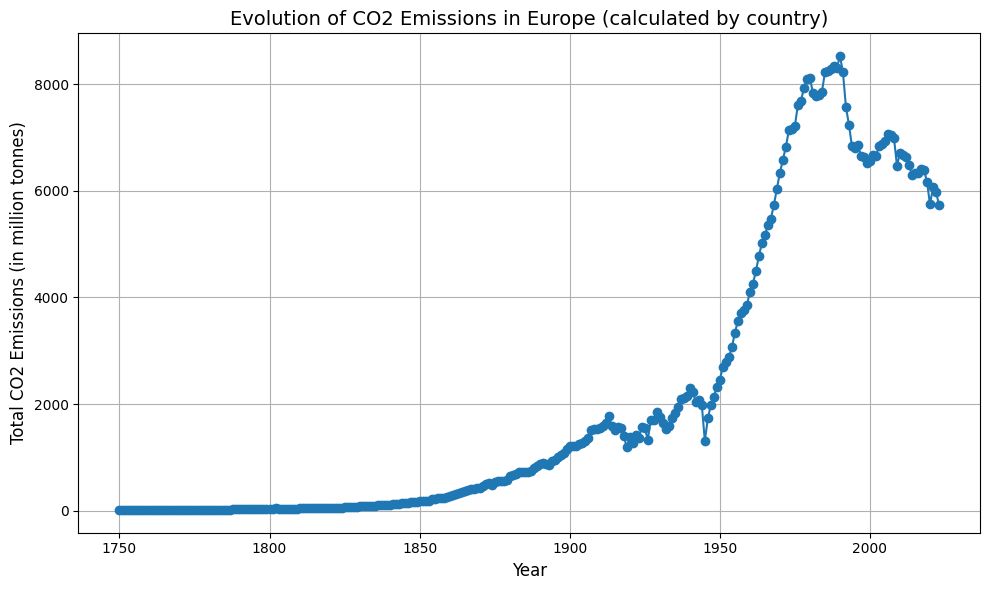

In [4]:
european_countries = [
    "Albania", "Andorra", "Armenia", "Austria", "Azerbaijan", "Belarus", "Belgium",
    "Bosnia and Herzegovina", "Bulgaria", "Croatia", "Cyprus", "Czechia", "Denmark",
    "Estonia", "Finland", "France", "Georgia", "Germany", "Greece", "Hungary", "Iceland",
    "Ireland", "Italy", "Kazakhstan", "Kosovo", "Latvia", "Liechtenstein", "Lithuania",
    "Luxembourg", "Malta", "Moldova", "Monaco", "Montenegro", "Netherlands", "North Macedonia",
    "Norway", "Poland", "Portugal", "Romania", "Russia", "San Marino", "Serbia",
    "Slovakia", "Slovenia", "Spain", "Sweden", "Switzerland", "Turkey", "Ukraine",
    "United Kingdom", "Vatican City"
]

# Filter the dataset for European countries
europe_data = df[df['country'].isin(european_countries)]

europe_emission_trend = europe_data.groupby('year')['co2'].sum().reset_index()

# Plot the trend
plt.figure(figsize=(10, 6))
plt.plot(europe_emission_trend['year'], europe_emission_trend['co2'], marker='o', linestyle='-')
plt.title('Evolution of CO2 Emissions in Europe (calculated by country)', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Total CO2 Emissions (in million tonnes)', fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()

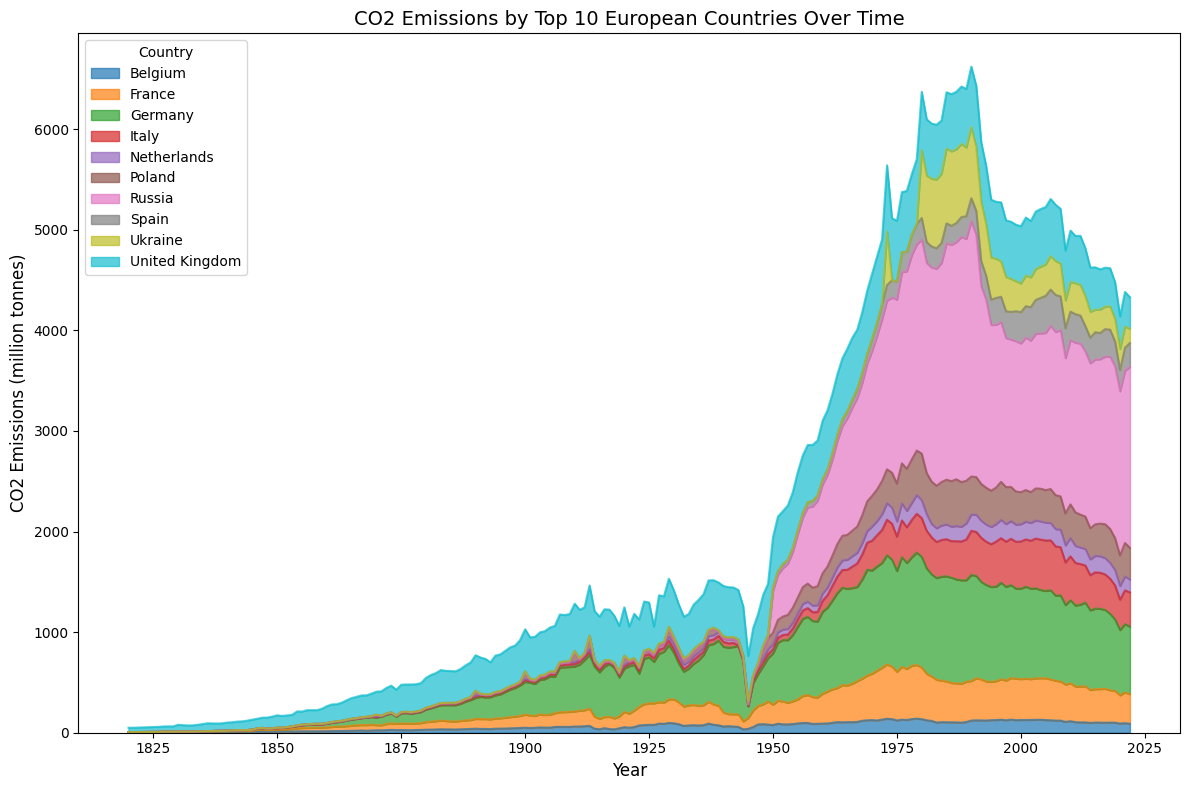

In [14]:
# Calculate total emissions by country in Europe
europe_total_emissions = europe_data.groupby('country')['co2'].sum().reset_index()
europe_total_emissions = europe_total_emissions.sort_values(by='co2', ascending=False).reset_index(drop=True)

# Get the top 10 countries by emissions
top_10_countries = europe_total_emissions['country'].head(10)

# Filter the data for only the top 10 countries
top_10_data = europe_data[europe_data['country'].isin(top_10_countries)]

# Prepare data for stacked area chart
top_10_trend = top_10_data.pivot_table(index='year', columns='country', values='co2', aggfunc='sum').fillna(0)

# Plot the stacked area chart
top_10_trend.plot(kind='area', stacked=True, figsize=(12, 8), alpha=0.7)
plt.title('CO2 Emissions by Top 10 European Countries Over Time', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('CO2 Emissions (million tonnes)', fontsize=12)
plt.legend(loc='upper left', fontsize=10, title='Country')
plt.tight_layout()
plt.show()

We see a sharp increase in the middle of 20th century. The expansion of manufacturing industries and the widespread adoption of fossil fuels, particularly coal and oil,after WW2,probably drove this increase. After the 1990s gradual decline in emissions is apparent.European countries began adopting strict environmental policies and EU-wide regulations to reduce greenhouse gases.

### Which countries are emitting and 
absorbing the most carbon?

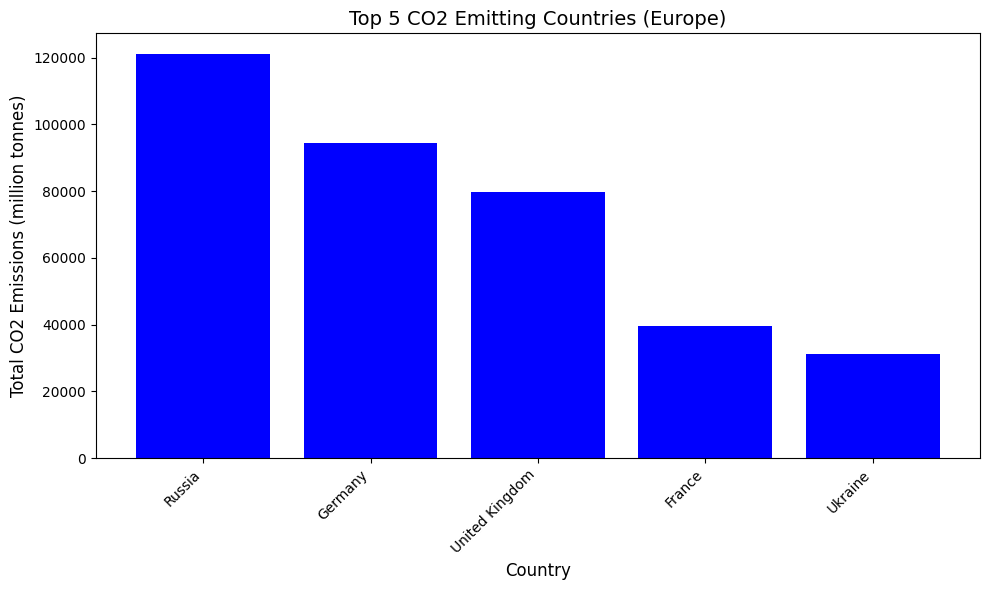

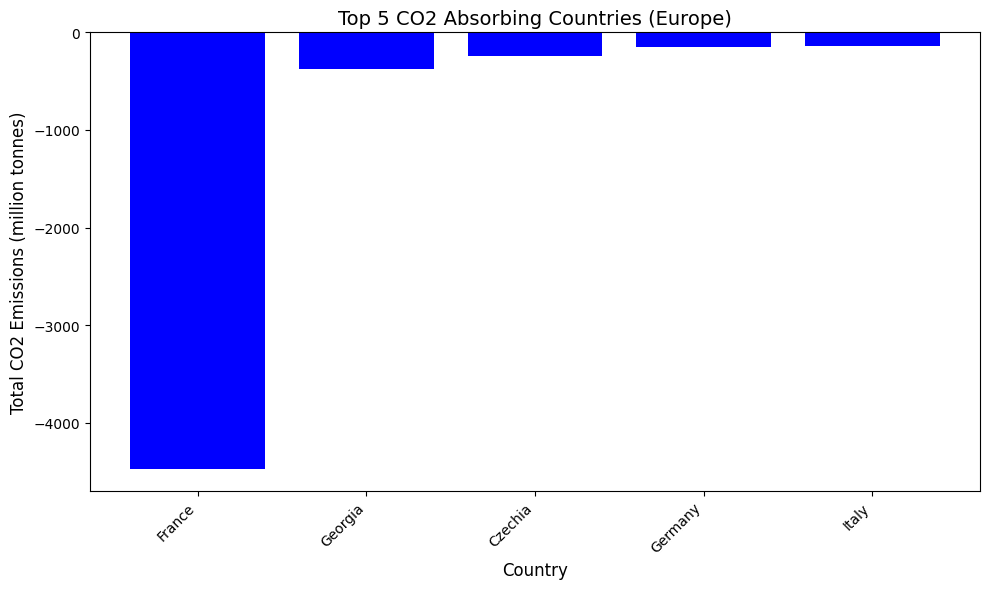

In [6]:
# Calculate total emissions by country in Europe
europe_emissions = europe_data.groupby('country')['co2'].sum().reset_index()
europe_emissions = europe_emissions.sort_values(by='co2', ascending=False).reset_index(drop=True)

# Calculate total absorption by country (land_use_change_co2) in Europe
europe_absorption = europe_data.groupby('country')['land_use_change_co2'].sum().reset_index()
europe_absorption = europe_absorption.sort_values(by='land_use_change_co2').reset_index(drop=True)

# Bar chart visualization for emissions
plt.figure(figsize=(10, 6))
plt.bar(europe_emissions.head(5)['country'], europe_emissions.head(5)['co2'], color='blue')
plt.title('Top 5 CO2 Emitting Countries (Europe)', fontsize=14)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Total CO2 Emissions (million tonnes)', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.tight_layout()
plt.show()

# Bar chart visualization for absorbers
plt.figure(figsize=(10, 6))
plt.bar(europe_absorption.head(5)['country'], europe_absorption.head(5)['land_use_change_co2'], color='blue')
plt.title('Top 5 CO2 Absorbing Countries (Europe)', fontsize=14)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Total CO2 Emissions (million tonnes)', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.tight_layout()
plt.show()

We see that larger countries or wealthier nations are at the top of the table for emitting CO2. However , most of these countries are also at the top of the absorbing list. We can do a similar thing for 'co2_per_capita' and 'co2_per_gdp' , and see if we find any differences. 

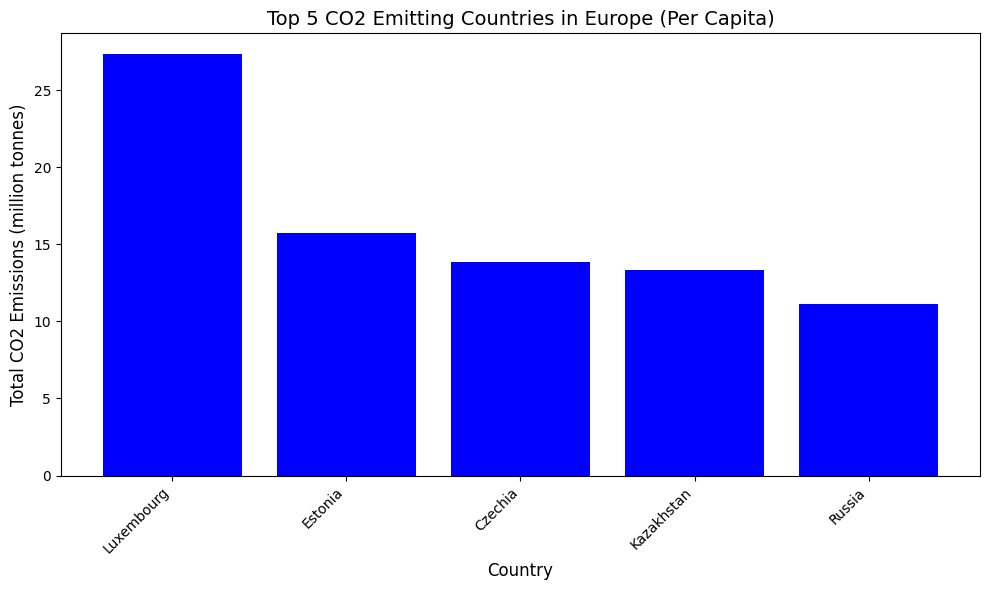

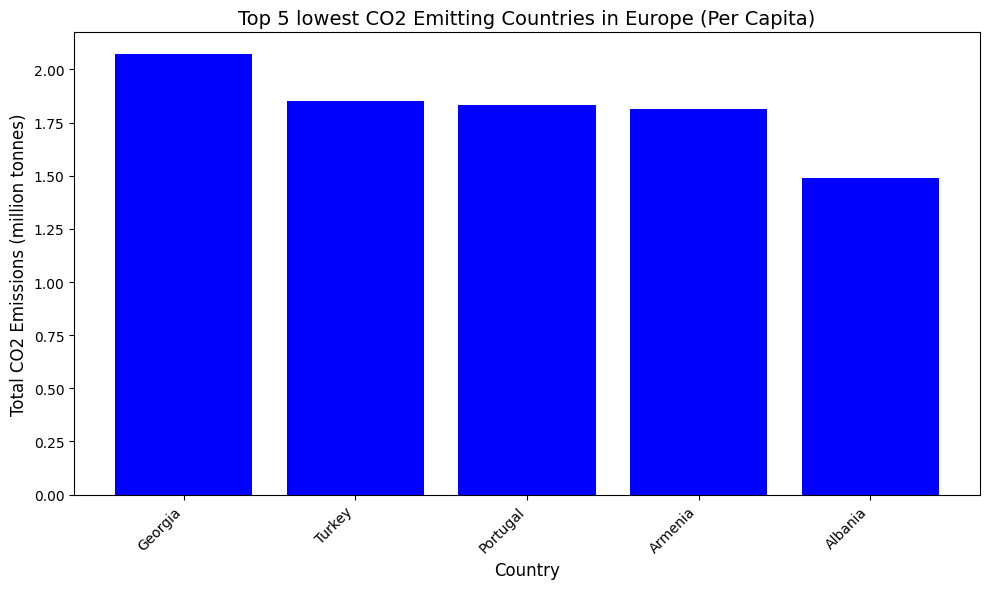

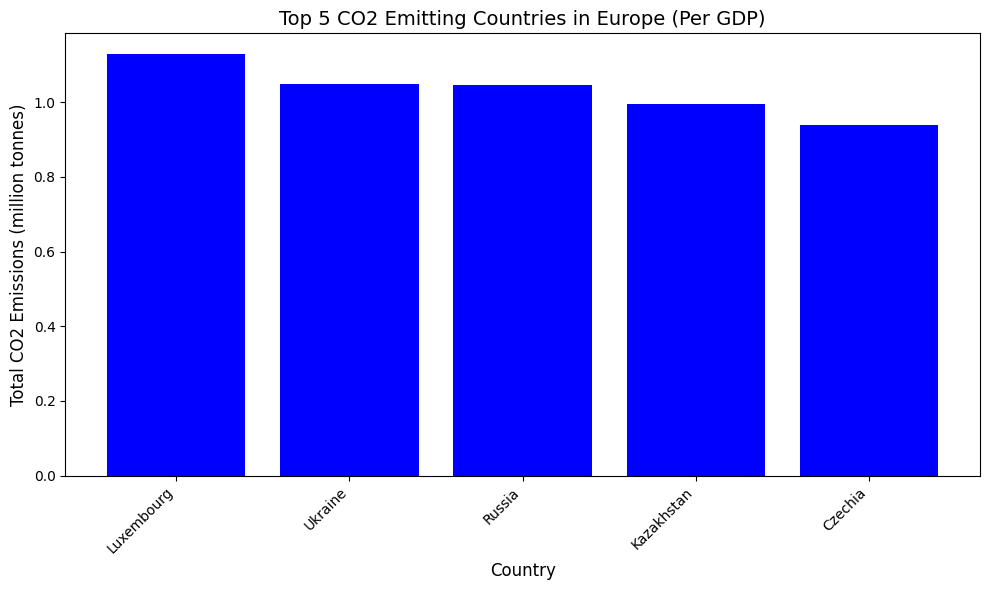

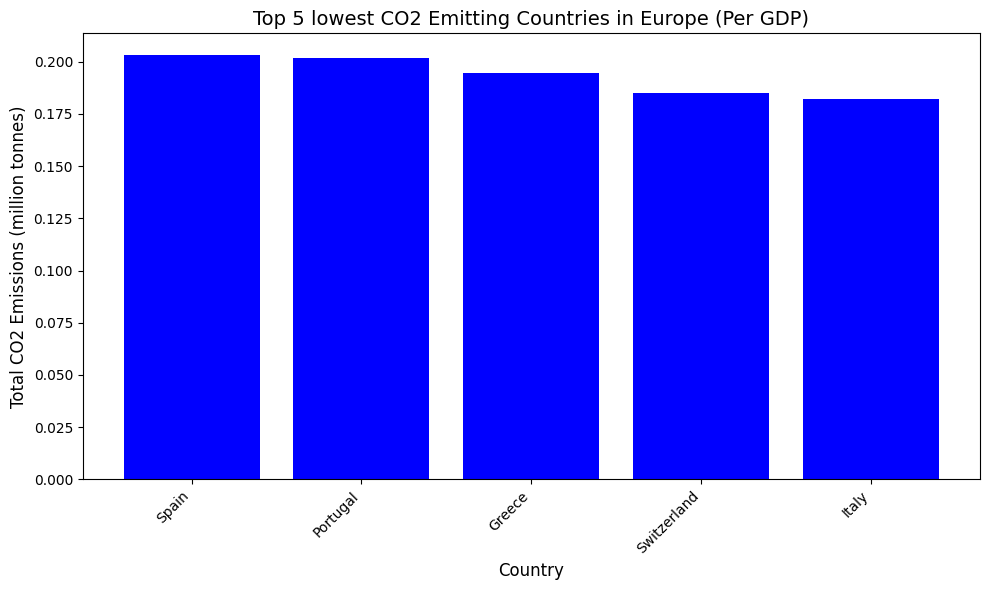

In [7]:
# Drop rows with missing data for `co2_per_capita` or `co2_per_gdp`
europe_data = europe_data.dropna(subset=['co2_per_capita', 'co2_per_gdp'])

# Aggregate to find average values per country
europe_co2_stats = europe_data.groupby('country').agg({
    'co2': 'sum',
    'population': 'mean',
    'gdp': 'mean',
    'co2_per_capita': 'mean',
    'co2_per_gdp': 'mean'
}).reset_index()

# Sort by CO2 per capita and per GDP
sorted_by_per_capita = europe_co2_stats.sort_values(by='co2_per_capita', ascending=False)
sorted_by_per_gdp = europe_co2_stats.sort_values(by='co2_per_gdp', ascending=False)

# Bar chart visualization for emitting countries by population
plt.figure(figsize=(10, 6))
plt.bar(sorted_by_per_capita.head(5)['country'], sorted_by_per_capita.head(5)['co2_per_capita'], color='blue')
plt.title('Top 5 CO2 Emitting Countries in Europe (Per Capita)', fontsize=14)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Total CO2 Emissions (million tonnes)', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
plt.bar(sorted_by_per_capita.tail(5)['country'], sorted_by_per_capita.tail(5)['co2_per_capita'], color='blue')
plt.title('Top 5 lowest CO2 Emitting Countries in Europe (Per Capita)', fontsize=14)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Total CO2 Emissions (million tonnes)', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.tight_layout()
plt.show()

# Bar chart visualization for emitting countries by GDP
plt.figure(figsize=(10, 6))
plt.bar(sorted_by_per_gdp.head(5)['country'], sorted_by_per_gdp.head(5)['co2_per_gdp'], color='blue')
plt.title('Top 5 CO2 Emitting Countries in Europe (Per GDP)', fontsize=14)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Total CO2 Emissions (million tonnes)', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
plt.bar(sorted_by_per_gdp.tail(5)['country'], sorted_by_per_gdp.tail(5)['co2_per_gdp'], color='blue')
plt.title('Top 5 lowest CO2 Emitting Countries in Europe (Per GDP)', fontsize=14)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Total CO2 Emissions (million tonnes)', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.tight_layout()
plt.show()

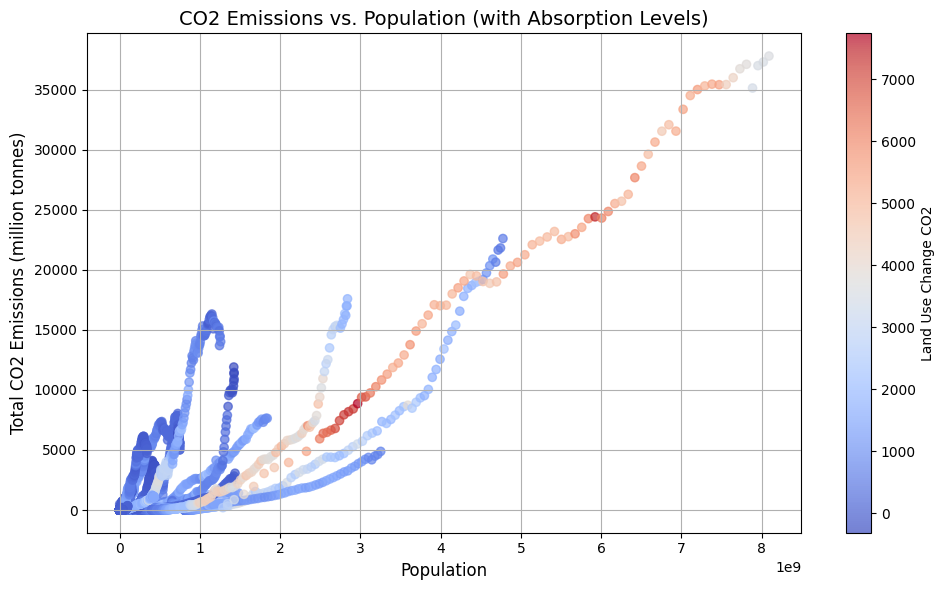

In [18]:
plt.figure(figsize=(10, 6))
plt.scatter(df['population'], df['co2'], c=df['land_use_change_co2'], cmap='coolwarm', alpha=0.7)
plt.title('CO2 Emissions vs. Population (with Absorption Levels)', fontsize=14)
plt.xlabel('Population', fontsize=12)
plt.ylabel('Total CO2 Emissions (million tonnes)', fontsize=12)
plt.colorbar(label='Land Use Change CO2')
plt.grid(True)
plt.tight_layout()
plt.show()

The 'co2_per_capita' measures the amount of CO2 emissions produced per individual in a country.As expected countries with low population tend to rank high in this rankings. Ukraine and Turkey , for example, have relatively low per capita emissions due to their larger populations, even if total emissions are high.**

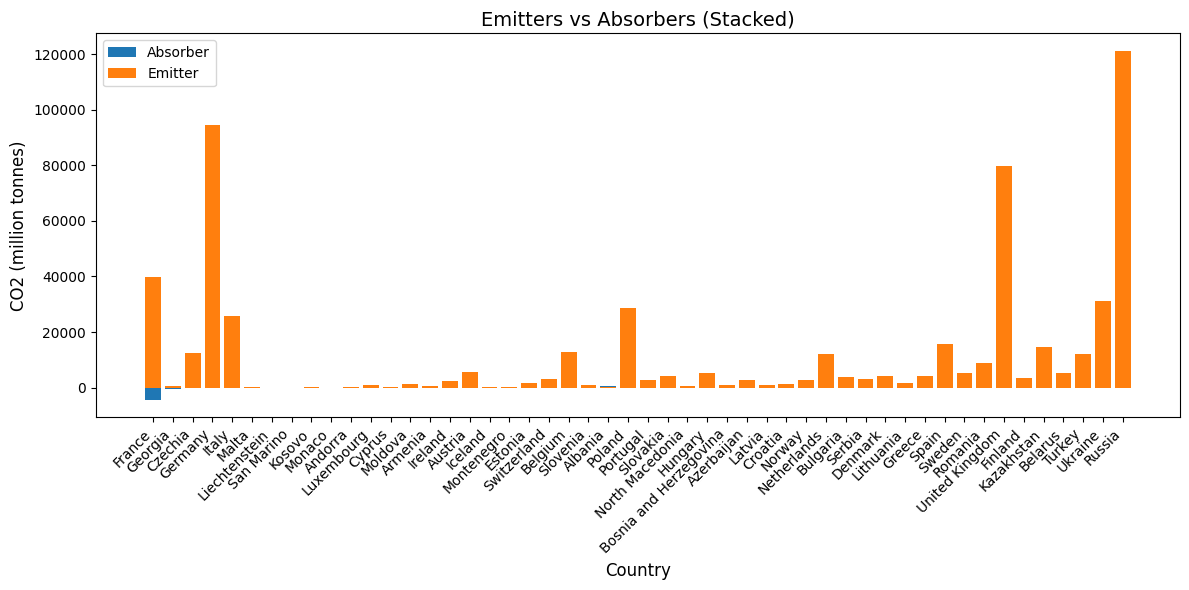

In [24]:
# Combine emitters and absorbers into one dataset
europe_emissions['type'] = 'Emitter'
europe_absorption['type'] = 'Absorber'
comparison = pd.concat([europe_emissions, europe_absorption.rename(columns={'land_use_change_co2': 'co2'})])

# Stacked bar chart
plt.figure(figsize=(12, 6))
for label, group in comparison.groupby('type'):
    plt.bar(group['country'], group['co2'], label=label)
plt.title('Emitters vs Absorbers (Stacked)', fontsize=14)
plt.xlabel('Country', fontsize=12)
plt.ylabel('CO2 (million tonnes)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()

## Are there differences when considering all carbon ever emitted
by a country?

//TODO Fjona : Study data and build graphs to try and answer the question. 

## Are there characteristics of countries that correlate with the changes in the
carbon emissions

//TODO ,Nicolas & Khasrur: Build and train a model if necessary. ?

TODO: Talk about 
difficulties in analysing the dat,?wWhat were the key insights obtaine andsw Which Data Science tools and techniques were learned
during this exerc.up?